
## Simulation involving Discreet Random Variables

The simplist outcomes in life are *binary*, that is, there are only 2 *discrete* mutually exclusive possible outcomes. In the animal kingdome, there are often fights to establish position in a social hierarchy, such as a fight to determine the dominant male in a lion pride. At the end of the fight, there is a clear *winner* who maintains or assumes his position as the alpha male, and there is a clear *loser*, who then assumes a subordinate position or, often, if forced to leave the pride.

Local elections, like for a school board member, are another example. People vote, and the candidate that gets the most votes *wins* and the other candidate *loses* – a *binary* outcome. What's interesting about this situation is that each individual voter also produces a *disctete binary* outcome; they either vote for one candidate or the other. Thus, the final binary outcome is actually the result of summing up many individual binary outcomes.

We will begin learning about 
 discrete probability scenarios by simulating very simple situations and seeing what the probability distributions look like when played out over several repeats of simulated experiments. The point of the above examples is to illustrate that the simple situations we will start exploring are actually rather deep, and form the foundation of the techniques that data scientists use to predict things like presidential elections and sporting events – the latter now being a data-science-based [billion dollar industry](https://www.businessofapps.com/data/sports-betting-app-market/#:~:text=%C2%A32.2%20billion-,US%20Sports%20Betting%20App%20Revenue,approximately%2020%25%20of%20global%20revenues.). 


### Objectives:
The objectives of this excercise are three-fold. The first is to expand on our skills of simulating data corresponding to real-world experimental situations.
The second is to use simulations to help us understand the fundamentals of probability, the behavior of random variables, and the use of probability distribution to predict outcomes. Finally, we will see the emergence of the normal distribution from discrete random processes through the Central Limit Theorem.

### Learning Goals:

* Simulating discrete random processes
* Understanding discrete probability distributions
* Gaining a deeper appreciation of Central Limit Theorem 

### Preliminaries:
As always, we'll import our needed libraries.



In [2]:
import numpy as np
import matplotlib.pyplot as plt

Because we're going to be generating a lot of random numbers, let's also import `numpy.random` with its own nickname to save ourselves some typing:

In [3]:
import numpy.random as rnd # random number generation – "rnd" is the conventional nickname

### Part 1: Simulating Discrete Random Variables

#### Coin Flipping
A very simple propablistic decision that results in a binary outcome is a simple coin flip. Each flip of a coin (or any other probabalitic event that results in one of two outcomes) is referred to as a "Bernoulli trial" (a "trial" being the conventional term in science for procedure that results in a single observation). A series of trials is referred to as an "experiment".

Let's do a single experiment consisting of 100 coin flips (i.e. 100 trials). To do this, were going to use `numpy.random`'s `choice()` function, which chooses items from a list we provide for a specified number of trials. Before you run the code, think about the expected number of heads and tails would be, assuming the coin is fair.

##### A single coin flipping experiment

In [4]:
# Set the random seed for reproducibility
rnd.seed(42)
n_trials = 100

# Simulate flipping a fair coin 100 times
coin_flips = rnd.choice(['Heads', 'Tails'], size=n_trials)
heads_count = np.sum(coin_flips == 'Heads')
tails_count = np.sum(coin_flips == 'Tails')

print(f'Heads: {heads_count}, Tails: {tails_count}')

Heads: 44, Tails: 56


Did we get exactly the number of heads you expected? If not, why not?  

Just for grins, let's make a bar graph of the results. We'll also add a horizontal line to indicate the expected number of heads and tails (`plt` can do a lot for you, so remember to check its methods if you want to make your plots better!).

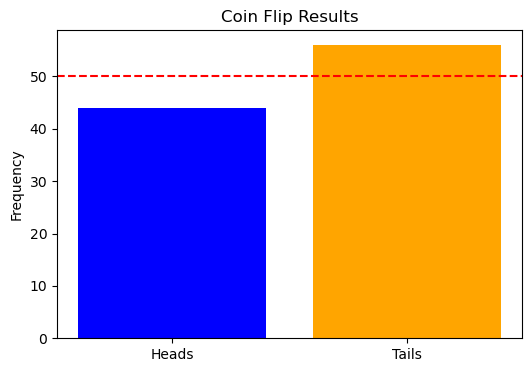

In [5]:
plt.figure(figsize=(6, 4))
plt.bar(['Heads', 'Tails'], [heads_count, tails_count], color=['blue', 'orange'])
plt.axhline(y=50, color='r', linestyle='--')
plt.ylabel('Frequency')
plt.title('Coin Flip Results')
plt.show()

##### Many coin flipping experiments

In [ ]:

# Step 1: Single binomial experiment with 100 trials
n_trials = 100
p_head = 0.5 # Assuming a fair coin
results = np.random.binomial(n=n_trials, p=p_head, size=100) # 100 repetitions

# Step 2: Histogram of the proportion of heads
proportions = results / n_trials
plt.hist(proportions, bins=10, edgecolor='black')
plt.title('Histogram of Proportions of Heads (100 Trials, Repeated 100 Times)')
plt.xlabel('Proportion of Heads')
plt.ylabel('Frequency')
plt.show()



In order to make easy & pretty plots of the distributions, let's import the `seaborn` plotting package.

In [ ]:
import seaborn as sns

In [ ]:
sample_sizes = [20, 50, 100, 200] # Different sample sizes
for size in sample_sizes:
    results = np.random.binomial(n=size, p=p_head, size=100)
    proportions = results / size
    sns.kdeplot(proportions, label=f'Sample Size: {size}', alpha=0.5)

plt.title('Overlayed KDEs of Proportions of Heads for Different Sample Sizes')
plt.xlabel('Proportion of Heads')
plt.ylabel('Density')
plt.legend()
plt.show()


#### A Simple Election

#### A More Complicated Election

#### Dice Rolling

1. Simulate rolling a fair six-sided die 100 times.


In [6]:
# Simulate rolling a fair six-sided die 100 times
dice_rolls = rnd.choice(np.arange(1, 7), size=100)

2. Plot the results in a bar chart showing the frequency of each outcome (1 through 6).



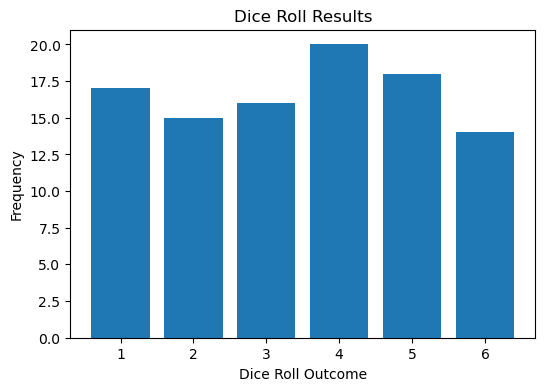

In [7]:
# Plot the results in a bar chart
plt.figure(figsize=(6, 4))
plt.hist(dice_rolls, bins=np.arange(0.5, 7.5, 1), rwidth=0.8)
plt.xlabel('Dice Roll Outcome')
plt.ylabel('Frequency')
plt.title('Dice Roll Results')
plt.xticks(np.arange(1, 7))
plt.show()

### Part 2: Approaching a Normal Distribution



#### Coin Flips



1. Simulate flipping a coin `n` times and counting the number of heads. Repeat this experiment 1000 times (each time with `n` flips) and plot the distribution of the number of heads using a histogram.


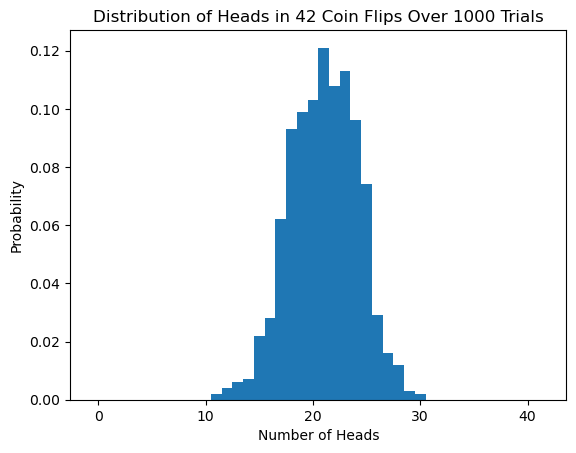

In [8]:
# Function to simulate coin flips and plot the distribution
def plot_coin_flip_distribution(flips, trials):
    heads_counts = np.sum(rnd.binomial(1, 0.5, (trials, flips)), axis=1)
    plt.hist(heads_counts, bins=np.arange(flips+1)-0.5, density=True)
    plt.xlabel('Number of Heads')
    plt.ylabel('Probability')
    plt.title(f'Distribution of Heads in {flips} Coin Flips Over {trials} Trials')
    plt.show()

plot_coin_flip_distribution(42, 1000)


2. Increase `n` step by step (e.g., 10, 50, 100, 250, 500) and observe how the distribution changes. Discuss how it starts to resemble a normal distribution as `n` increases.



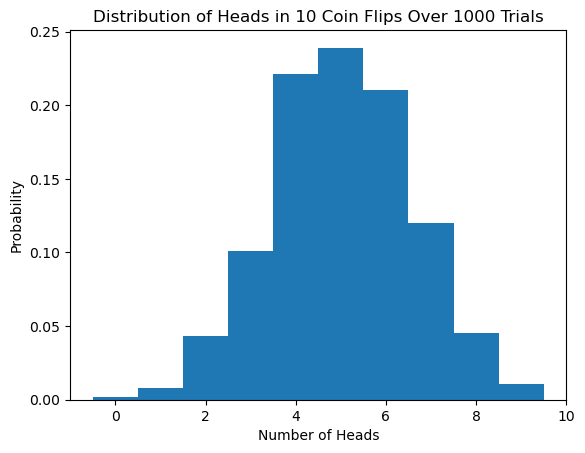

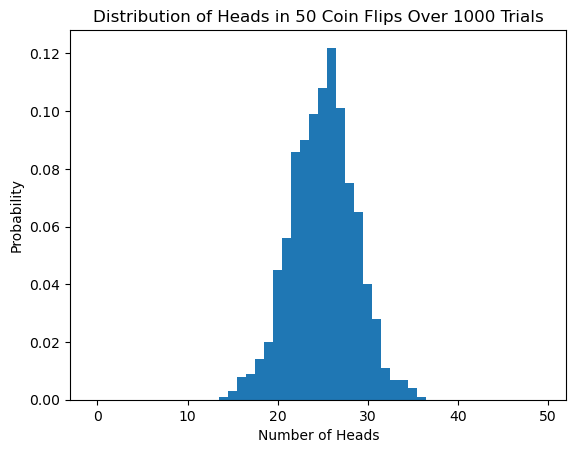

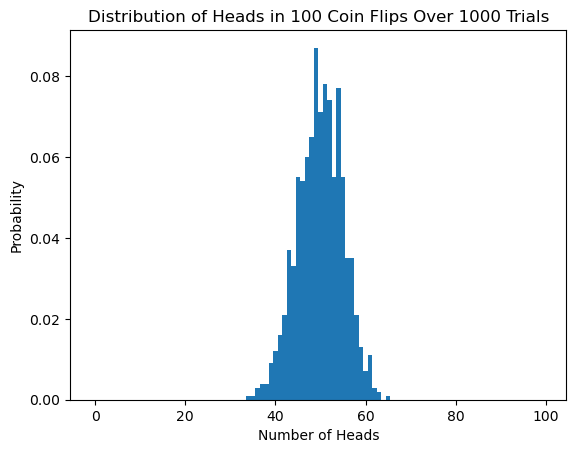

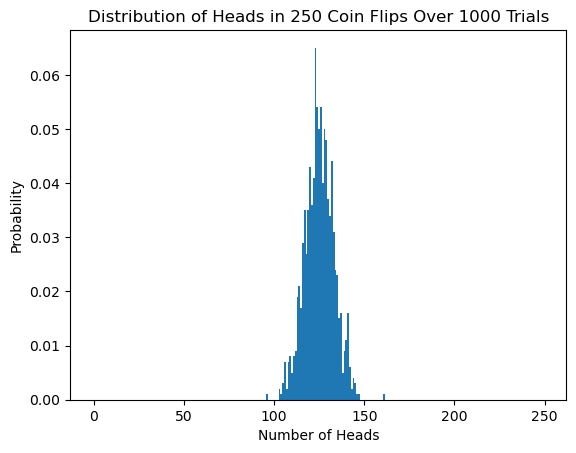

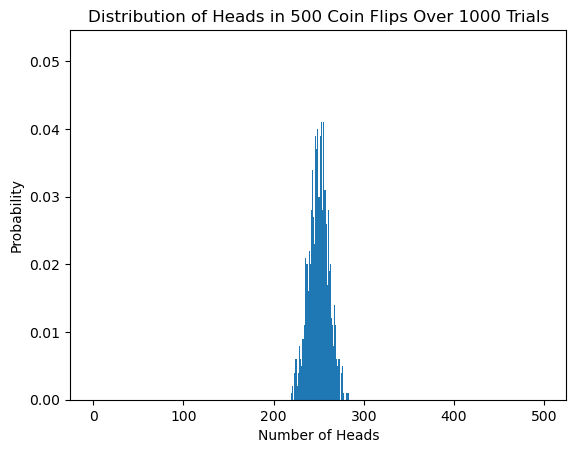

In [9]:
# Simulate different numbers of flips
flip_counts = [10, 50, 100, 250, 500]
for flips in flip_counts:
    plot_coin_flip_distribution(flips, 1000)

#### Dice Rolls



1. Simulate rolling `k` dice and adding up the scores. Repeat this 1000 times and plot the resulting sums in a histogram.


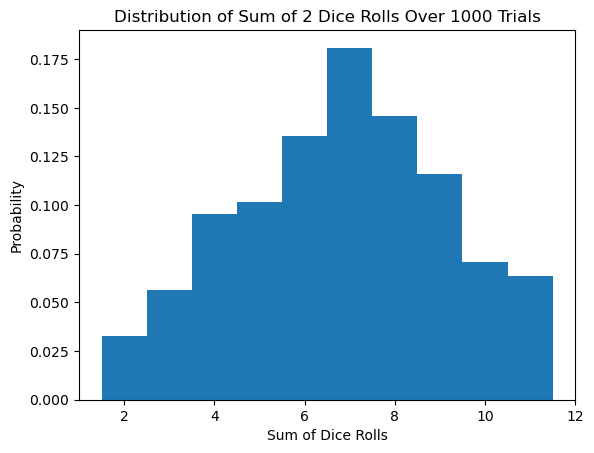

In [10]:
# Function to simulate dice rolls and plot the distribution
def plot_dice_roll_distribution(num_dice, trials):
    dice_sums = np.sum(rnd.randint(1, 7, (trials, num_dice)), axis=1)
    plt.hist(dice_sums, bins=np.arange(num_dice, num_dice*6+1)-0.5, density=True)
    plt.xlabel('Sum of Dice Rolls')
    plt.ylabel('Probability')
    plt.title(f'Distribution of Sum of {num_dice} Dice Rolls Over {trials} Trials')
    plt.show()


plot_dice_roll_distribution(2, 1000)


2. Increase `k` incrementally (e.g., 2, 5, 10, 20) and observe how the distribution evolves. Illustrate how, as `k` increases, the distribution approximates a normal distribution.



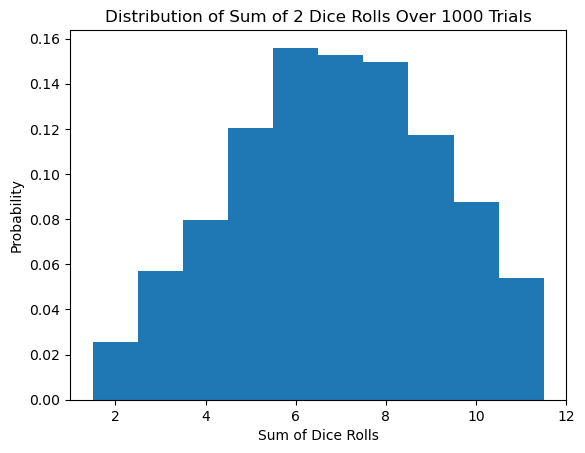

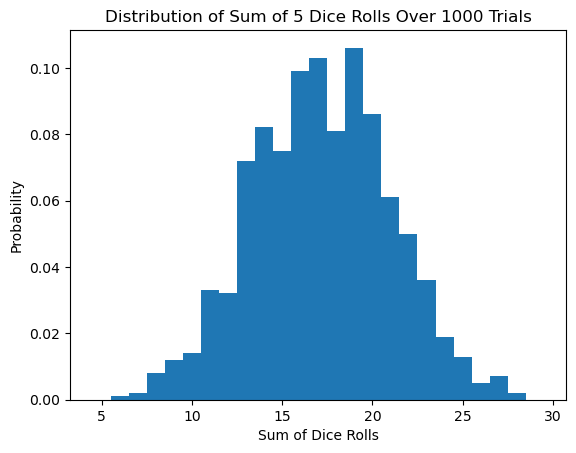

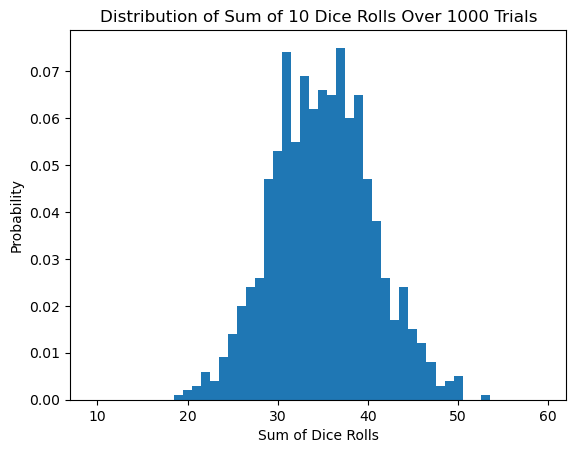

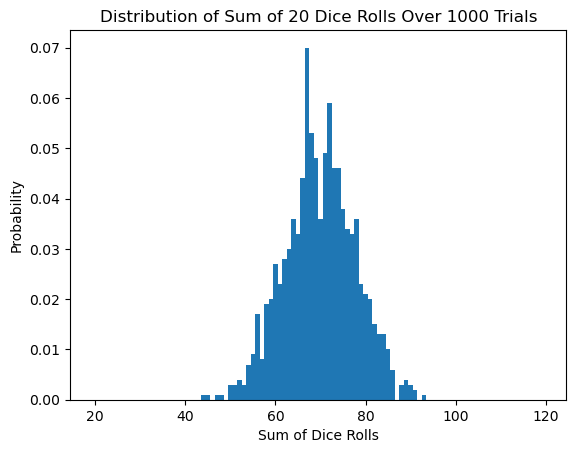

In [11]:
# Simulate different numbers of dice
dice_counts = [2, 5, 10, 20]
for num_dice in dice_counts:
    plot_dice_roll_distribution(num_dice, 1000)

### Summary:



